# <center>MO444 - Aprendizado de Máquina e Reconhecimento de Padrões</center>
## <center>Primeiro semestre de 2021</center>
## <center>Projeto 2: Regressão e Classificação</center>
## <center>Discentes: Elisa Dell Arriva (135551) e Felipe de Carvalho Pereira (230214)</center>
_________________________________________________________________________

# 1 Introdução

O presente *notebook* consiste no segundo projeto avaliativo da disciplina MO444 - Aprendizado de Máquina e Reconhecimento de Padrões, ministrada pela Profa. Dra. Esther Colombini. O principal objetivo da atividade foi o de implementar e experimentar métodos de aprendizado de máquina para resolver tarefas de classificação e regressão.<br>

Na primeira parte do projeto, descrita na Seção 2, implementamos um algoritmo de regressão linear e polinomial com uso da técnica denominada *gradiente descendente*. Em seguida, aplicamos esse algoritmo para cada um dos dois *datasets* fornecidos e analisamos os resultados obtidos.

Na segunda etapa, descrita na Seção 3, (?)


# 2 *Parte $I$ - Tarefa de Regressão*

Nesta tarefa, almejamos aplicar métodos de regressão linear e polinomial para prever a trajetória de uma bola de futebol. Inicialmente, considere que temos uma sequência de pontos do espaço 3-dimensional, de maneira que tais pontos representam as primeiras posições da bola a partir de um certo instante de tempo. Para cada uma das dimensões ($X, Y$ e $Z$), encontramos equações que explicam a trajetória da bola para os pontos fornecidos em função do tempo. Em seguida, utilizamos tais equações para extrapolar as informações já conhecidas e deduzir a continuação da trajetória da bola.

Junto à especificação do projeto, foram disponibilizados dois *datasets*, denominados kick1 e kick2. Em ambos os *datasets* temos 20 linhas. Cada linha descreve os valores das 3 coordenadas da bola no instante de tempo em que a captura foi feita. De acordo com a especificação, as capturas foram feitas com uma taxa de 60 *frames* por segundo. Assumiremos que os pontos descritos foram capturados de maneira sequencial a partir de algum instante de tempo após o chute.

Neste ponto, apresentamos o nosso algoritmo de regressão polinomial, o qual foi baseado no método gradiente descendente, visto em aula. Dizemos que um polinômio *descreve* um conjunto de planos no ponto cartesiano, se a curva produzida por esse polinômio se aproxima dos pontos dispostos no plano. Suponha que desejamos obter uma equação polinomial de grau $n \geq 1$ representada por $f(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \dots + \theta_n x^n$ que descreve um conjunto de pontos dados.

Denote por $x_i$ e $y_i$ as coordenadas do $i$-ésimo ponto, entre os $m$ pontos anotados. Seja $J(\theta_0, \dots, \theta_n) = \dfrac{1}{2m} \cdot \sum_{i = 0}^m (f(x_i) - y_i)^2$ a função de custo (*squared error function*) dos coeficientes em relação aos $m$ pontos. Nosso objetivo é encontrar valores para os coeficientes que minimizam $J(\theta_0, \dots, \theta_n)$. Suponha que, inicialmente, o valor do coeficiente $\theta_k$ é arbitrário para todo $k \in \{0,1,2, \dots, n\}$. Além disso, assuma que o algoritmo recebe um parâmetro $\alpha$ chamado de *learning rate*. Em cada iteração do algoritmo, fazemos o que segue.

Para cada coeficiente $\theta_k$, calculamos $t_k \leftarrow \theta_k - \alpha \cdot \dfrac{\partial}{\partial \theta_k} J(\theta_0, \dots, \theta_n)$. Em seguida, fazemos $\theta_k \leftarrow t_k$ para cada $k \in \{0,1,2, \dots, n\}$.

O procedimento do parágrafo acima é repetido até que $|t_k - \theta_k| < \beta$ para todo $k \in \{0,1,2, \dots, n\}$, onde $\beta$ é denominado *valor de tolerância*. Quando isso ocorre, significa que a mudança em cada coeficiente foi menor do que a tolerância adotada e, portanto, consideramos que o algoritmo convergiu para um valor próximo do mínimo.

Note que, de acordo com o que vimos em aula, $\dfrac{\partial}{\partial \theta_k} J(\theta_0, \dots, \theta_n) = \dfrac{1}{m} \cdot \sum_{i = 1}^{m}(f(x_i) - y_i) \cdot x_{i}^{k}$. Além disso, observe que se $n = 1$, então trata-se do caso em que obtemos uma regressão linear.

A seguir, temos o código-fonte relativo à Parte $I$ do projeto.

In [7]:
# Modules import
import numpy as np
import pandas as pd
import random
import statistics
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

In [2]:
def plot_2D_points(x_points, y_points):
    plt.scatter(x_points, y_points, color="red")
    plt.grid(linestyle='--')
    plt.show()
    plt.close()
    
def plot_2D_regression(x_points, y_points, min_input, max_input, coefficients_array):
    plt.scatter(x_points, y_points, color="blue")
    x_line_points = np.linspace(min_input, max_input,100)
    y_line_points = np.zeros(100)
    for i in range(coefficients_array.size):
        y_line_points += coefficients_array[i]*(x_line_points**i)
    plt.plot(x_line_points, y_line_points, '-o', color='red', linewidth=1, markersize=0)
    plt.grid(linestyle='--')
    plt.show()
    plt.close()
    
def plot_3D_regression(x_points, y_points, z_points, coefficients_array_X, coefficients_array_Y, coefficients_array_Z):
    
    
    fig = plt.figure()
    ax = plt.axes(projection="3d")
    ax.set_xlim3d(-3, 3)
    ax.set_ylim3d(0, 2.1)
    ax.set_zlim3d(0, 0.3)
        
    root_y = max(np.roots(np.flip(coefficients_array_Y)))
    time_stamps = np.linspace(0, root_y, 100)

    x_line_points = np.zeros(100)
    y_line_points = np.zeros(100)
    z_line_points = np.zeros(100)
    for i in range(coefficients_array_X.size):
        x_line_points += coefficients_array_X[i]*(time_stamps**i)
        y_line_points += coefficients_array_Y[i]*(time_stamps**i)
        z_line_points += coefficients_array_Z[i]*(time_stamps**i)
    
    ax.plot3D(x_line_points, y_line_points, z_line_points, color='red')
    ax.plot(x_line_points, y_line_points, np.zeros(z_line_points.size), color='gray')
    ax.plot(x_line_points, np.array([2]*y_line_points.size), z_line_points, color='gray')
    ax.plot(np.array([-3]*x_line_points.size), y_line_points, z_line_points, color='gray')
    
    ax.scatter3D(x_points, y_points, z_points, color='blue')
    ax.scatter(x_points, y_points, np.zeros(z_points.size), color='gray')
    ax.scatter(x_points, np.array([2]*y_points.size), z_points, color='gray')
    ax.scatter(np.array([-3]*x_points.size), y_points, z_points, color='gray')
        
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
    ax.view_init(20, -60)

    plt.show()
    plt.close()
    
def get_new_coef_array(degree, min_value, max_value):
    array = random.sample(range(min_value, max_value), degree+1)
    return np.array(array, dtype="float64")

def get_hypothesis_value(coefficients_array, x):
    hypothesis_value = 0
    for i in range(coefficients_array.size):
        hypothesis_value += coefficients_array[i]*(x**i)
    return hypothesis_value

def get_hypothesis_values_array(coefficients_array, input_values):
    hypothesis_values_array = np.empty(input_values.size)
    for i in range(input_values.size):
        hypothesis_values_array[i] = get_hypothesis_value(coefficients_array, input_values[i])
    return hypothesis_values_array

def get_partial_derivatives_array(coefficients_array, hypothesis_values_array, input_values, output_values):
    diference_values_array = np.empty(input_values.size)
    for i in range(input_values.size):
        diference_values_array[i] = hypothesis_values_array[i] - output_values[i]
    
    partial_derivatives_array = np.zeros(coefficients_array.size)
    
    for i in range(input_values.size):
        auxiliar_variable = diference_values_array[i]
        for j in range(coefficients_array.size):
            auxiliar_variable += auxiliar_variable*input_values[i]
            partial_derivatives_array[j] += auxiliar_variable
    
    for i in range(coefficients_array.size):
        partial_derivatives_array[i] = partial_derivatives_array[i]/input_values.size

    return partial_derivatives_array

def update_coefficients_array(coefficients_array, partial_derivatives_array, learning_rate):
    
    for i in range(coefficients_array.size):
        coefficients_array[i] = coefficients_array[i] - learning_rate*partial_derivatives_array[i]

def get_regression(input_values, output_values, degree, learning_rate, tolerance):
    
    #plot_2D_points(input_values, output_values)
    coefficients_array = np.zeros(degree+1)
    #plot_2D_regression(input_values, output_values, 0, (1/60)*19, coefficients_array)

    iteration = 1
    while(True):
        old_coefficients_array = coefficients_array.copy()
        hypothesis_values_array = get_hypothesis_values_array(coefficients_array, input_values)
        partial_derivatives_array = get_partial_derivatives_array(coefficients_array, hypothesis_values_array, input_values, output_values)    
        update_coefficients_array(coefficients_array, partial_derivatives_array, learning_rate)

        #if (iteration % 10000 == 0):
        #    print("Iteration #" + str(iteration) + "\n")
        #    print(coefficients_array)
        #    plot_2D_regression(input_values, output_values, 0, (1/60)*19, coefficients_array)

        if max(abs(coefficients_array - old_coefficients_array)) < tolerance:
            break

        iteration += 1
        
    return coefficients_array, iteration
    
    


Iteration #74694

[-0.23369339 -3.44184776  1.48483056]


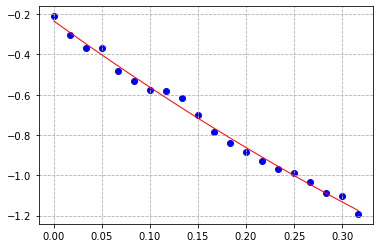

Iteration #75336

[ 2.04762221 -2.93886556 -0.16518063]


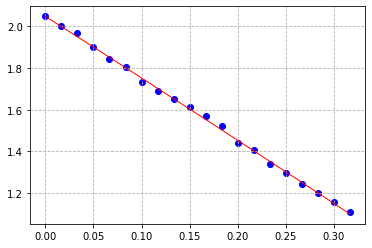

Iteration #413

[ 0.12166377  0.01277229 -0.12014564]


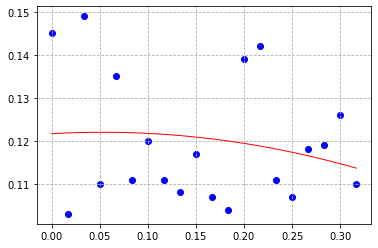

In [3]:
################# Main code ################# 

df = pd.read_table("kick1.dat", sep=' ', header=None).to_numpy()
time_stamps = np.linspace(0,(1/60)*19,20)
output_values_X = df[:,0]
output_values_Y = df[:,1]
output_values_Z = df[:,2]

#Predicting X
degree = 2
learning_rate = 0.95
tolerance = 0.00001

coefficients_array_X, iteration = get_regression(time_stamps, output_values_X, degree, learning_rate, tolerance)
print("Iteration #" + str(iteration) + "\n")
print(coefficients_array_X)
plot_2D_regression(time_stamps, output_values_X, 0, (1/60)*19, coefficients_array_X)

#Predicting Y
degree = 2
learning_rate = 0.95
tolerance = 0.00001

coefficients_array_Y, iteration = get_regression(time_stamps, output_values_Y, degree, learning_rate, tolerance)
print("Iteration #" + str(iteration) + "\n")
print(coefficients_array_Y)
plot_2D_regression(time_stamps, output_values_Y, 0, (1/60)*19, coefficients_array_Y)

#Predicting Z
degree = 2
learning_rate = 0.95
tolerance = 0.00001

coefficients_array_Z, iteration = get_regression(time_stamps, output_values_Z, degree, learning_rate, tolerance)
print("Iteration #" + str(iteration) + "\n")
print(coefficients_array_Z)
plot_2D_regression(time_stamps, output_values_Z, 0, (1/60)*19, coefficients_array_Z)



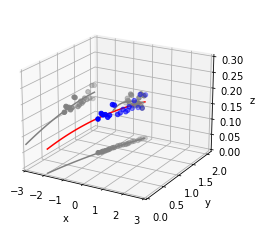

In [4]:
#Ploting 3D regression
plot_3D_regression(output_values_X, output_values_Y, output_values_Z,
                   coefficients_array_X, coefficients_array_Y, coefficients_array_Z)